<a href="https://colab.research.google.com/github/hasanasyarie/PSDS_KelasMahir/blob/main/Hasan_Asy_Arie_1800015105_TugasB4P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [119]:
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
%matplotlib inline


# **Mengakses dataset**

In [121]:
df = pd.read_csv('https://raw.githubusercontent.com/hasanasyarie/PSDS_KelasMahir/main/heart.csv')
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#**Eksploratory Data Analysis**

### Dimensi Data

In [122]:
df.shape

(303, 14)

Artinya kita memiliki data dengan 14 kolom dan 303 baris

### Variabel Pada Dataset

In [123]:
df.columns.values 

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [124]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [125]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Kita dapat mengetahui tipe-tipe data masing-masing variabel dan nama-nama variabel dalam dataset

### Mengecek Missing Data

In [126]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

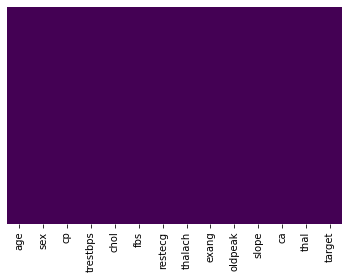

In [127]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

### Mengecek Outlier

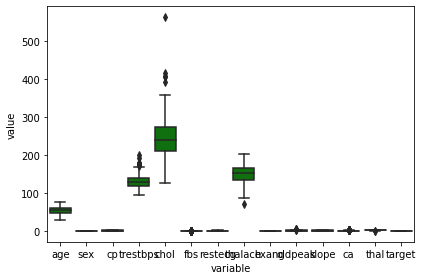

In [128]:
df1=df.select_dtypes(include=['float64', 'int64']) #Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()

Kolom numeric yang memiliki outlier adalah terstbps, chol, fbs, restecg, thalach, oldpeak, ca dan thal

### Melihat Korelasi Data

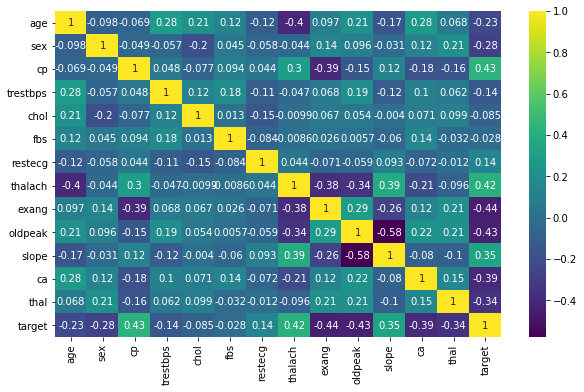

In [129]:
k = len(df1.columns)
cm = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

### Melihat Statistik Data

In [130]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Kita menggunakan fungsi describe() untuk mengetahui data statistika deskriptif untuk setiap kolom yang bertipe data numeric seperti count, mean, standard deviation, maximum, minum, dan quartile

#**Data Preprocessing**

### Menghapus Outlier

Rentang interkuartil (IQR) adalah ukuran penyebaran statistik dan dihitung sebagai perbedaan antara persentil ke-75 dan ke-25. Ini diwakili oleh rumus IQR = Q3 - Q1. Baris kode di bawah menghitung dan mencetak kisaran interkuartil untuk setiap variabel dalam dataset.

Teknik ini menggunakan skor IQR yang dihitung sebelumnya untuk menghilangkan pencilan. Aturan praktisnya adalah bahwa segala sesuatu yang tidak berada dalam kisaran (Q1 - 1.5 IQR) dan (Q3 + 1.5 IQR) adalah pencilan, dan dapat dihapus.

Metode ini dipakai karena untuk identifikasi outlier awal digunakan metode boxplot.

In [131]:
#Menghitung Skor IQR
sorted(df)

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [132]:
#Menghapus Outlier
df_clear = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clear

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


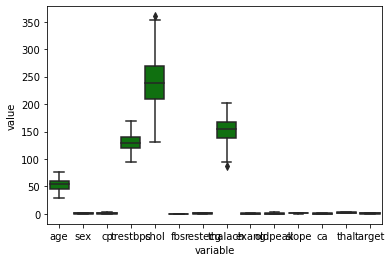

In [133]:
#Melihat Outlier
sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df_clear))

plt.show()

Outlier berhasil dihapus

### Normalisasi Data



In [134]:
#Normalisasi data dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_clear), columns=df_clear.columns)

df_norm

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.170213,1.0,0.666667,0.473684,0.519651,0.0,0.5,0.868421,0.0,0.875,0.0,0.0,0.5,1.0
1,0.255319,0.0,0.333333,0.473684,0.318777,0.0,0.0,0.736842,0.0,0.350,1.0,0.0,0.5,1.0
2,0.574468,1.0,0.333333,0.342105,0.458515,0.0,0.5,0.789474,0.0,0.200,1.0,0.0,0.5,1.0
3,0.595745,0.0,0.000000,0.342105,0.973799,0.0,0.5,0.657895,1.0,0.150,1.0,0.0,0.5,1.0
4,0.595745,1.0,0.000000,0.605263,0.266376,0.0,0.5,0.526316,0.0,0.100,0.5,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.723404,0.0,0.000000,0.394737,0.288210,0.0,0.5,0.421053,1.0,0.000,0.5,0.0,0.5,0.0
224,0.595745,0.0,0.000000,0.605263,0.480349,0.0,0.5,0.307018,1.0,0.050,0.5,0.0,1.0,0.0
225,0.340426,1.0,1.000000,0.210526,0.580786,0.0,0.5,0.385965,0.0,0.300,0.5,0.0,1.0,0.0
226,0.595745,1.0,0.000000,0.473684,0.000000,0.0,0.5,0.236842,1.0,0.300,0.5,0.5,1.0,0.0


### Memilih Variable Target & Variabel Independent

In [135]:
y=df_norm['target']
X=df_norm.drop(columns=['target'])

#Mengubah data menjadi array
y=np.array(y)
X=np.array(X)

print(y)
print(X)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.17021277 1.         0.66666667 ... 0.         0.         0.5       ]
 [0.25531915 0.         0.33333333 ... 1.         0.         0.5       ]
 [0.57446809 1.         0.33333333 ... 1.         0.         0.5       ]
 ...
 [0.34042553 1.         1.         ... 0.5        0.         1.        ]
 [0.5957

# **Pemodelan KNN**

In [136]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

X = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [137]:
# Membagi data menjadi data latih dan data uji
X_latih, X_tes, y_latih, y_tes = train_test_split(X,y,test_size = 0.21,random_state=0)

In [138]:
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_latih, y_latih)
prediction = knn.predict(X_tes)

print("{} NN Score: {:.2f}%".format(2, knn.score(X_tes, y_tes)*100))

2 NN Score: 84.38%


###Scikit Learn

In [139]:
# Klasifikasi dengan sejumlah K=3 Tetangga Terdekat
neigh = KNeighborsClassifier(n_neighbors=3)

# Memilih fitur dan label
neigh.fit(X_latih, y_latih)

# Kelas Hasil Prediksi
pred=neigh.predict(X_tes)
print(pred[0])

# 3 Tetangga Terdekat
tetangga=neigh.kneighbors(X_tes)[1]
print(tetangga[0])

0
[128 159 231]


###Matrik Konfusi KNN

In [140]:
confusion_matrix(y_tes,prediction)

array([[25,  2],
       [ 8, 29]])

# **Pemodelan Naive Bayes**

In [141]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

X = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [142]:
X_latih, X_tes, y_latih, y_tes = train_test_split(X, y, test_size=0.2, random_state=123)

In [143]:
def akurasi(y_asli, y_pred):
    akr = np.sum(y_asli == y_pred) / len(y_asli)
    return akr

In [144]:
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()

# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(X_latih, y_latih)

# Menentukan hasil prediksi dari x_test
prediksi_1 = nbtrain.predict(X_tes)

print("Akurasi Klasifikasi Naive Bayes", akurasi(y_tes, prediksi_1)*100, "%")

Akurasi Klasifikasi Naive Bayes 83.60655737704919 %


###Matrik Konfusi Naive Bayes

In [145]:
confusion_matrix(y_tes,prediksi_1)

array([[27,  3],
       [ 7, 24]])